读取数据;
将数据分为自变量x和因变量y;
过采样SMOTE取得数据集X,Y，并由X,Y随机划分训练集和测试集

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


def get_data():
    data = pd.read_excel('/Users/ycy/Desktop/default_of_credit_card_clients_2.xls', skiprows=[0], header=0, index_col=[0])
    x_feature = list(data.columns)
    x_feature.remove('default payment next month')
    x = data[x_feature]
    y = data['default payment next month']
    sm = SMOTE(random_state=42)# 处理过采样的方法
    X, Y = sm.fit_sample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state =0)
    return x_train, x_test, y_train, y_test

# 1 decision tree

训练模型，计算用时，计算准确率，精确率和召回率（通过混淆矩阵计算）

In [2]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


def DT_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_DT = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=5) # 决策树分类器
    #参数说明：https://blog.csdn.net/li980828298/article/details/51172744
    clf_model_DT.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_DT.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_DT.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----DecisionTree----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_DT.score(x_train, y_train))
    print("test accuracy:", clf_model_DT.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [3]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt
    

Time usage: 0.2886068820953369 s
----DecisionTree----
Confusion matrix for training dataset is 
 [[16383  2368]
 [ 4708 13923]] 
 Confusion matrix for testing dataset is 
 [[3989  624]
 [1218 3515]].
train accuracy: 0.810711037397678
test accuracy: 0.8029103359726086
Precision: 0.8492389466054603
Recall: 0.7426579336572998


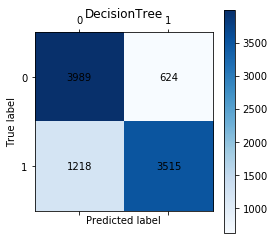

In [4]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = DT_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'DecisionTree').show() #显示混淆矩阵可视化结果

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

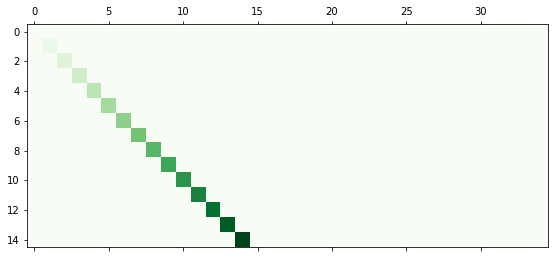

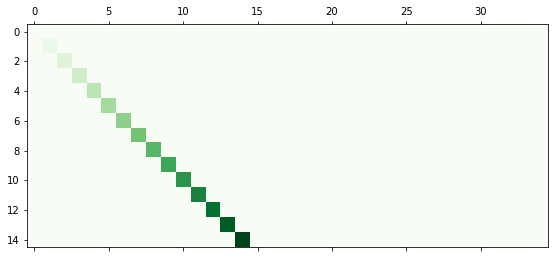

In [5]:
#plt.matshow用法
import numpy as np


def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal""" #定义一个矩阵
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa


# Display matrix
print(samplemat((15,35)))
plt.matshow(samplemat((15, 35)),cmap=plt.cm.Greens) #dims=(15,35) #cmap也可不写，不写则为默认颜色

plt.show()

# 2 random forest

In [6]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


def RF_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_RF = RandomForestClassifier(n_estimators=30,max_depth=15) #随即森林分类器
    #参数说明：https://blog.csdn.net/u012102306/article/details/52228516
    clf_model_RF.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_RF.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_RF.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----RandomForest----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_RF.score(x_train, y_train))
    print("test accuracy:", clf_model_RF.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [7]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 2.3170218467712402 s
Time usage: 2.3170218467712402 s
----RandomForest----
Confusion matrix for training dataset is 
 [[18399   352]
 [ 1907 16724]] 
 Confusion matrix for testing dataset is 
 [[4248  365]
 [ 826 3907]].
train accuracy: 0.9395698464501632
----RandomForest----
Confusion matrix for training dataset is 
 [[18399   352]
 [ 1907 16724]] 
 Confusion matrix for testing dataset is 
 [[4248  365]
 [ 826 3907]].
train accuracy: 0.9395698464501632
test accuracy: 0.8725658035523218
Precision: 0.9145599250936329
Recall: 0.8254806676526516
test accuracy: 0.8725658035523218
Precision: 0.9145599250936329
Recall: 0.8254806676526516


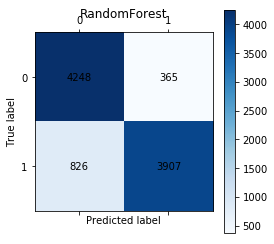

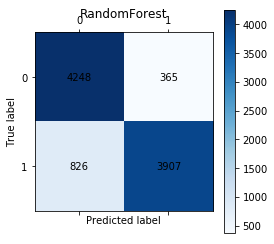

In [8]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = RF_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'RandomForest').show() #显示混淆矩阵可视化结果

# 3 梯度提升决策树(GBDT)

In [9]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


def GBDT_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_GBDT = GradientBoostingClassifier(n_estimators=30,max_depth=15) #参数设说明：https://blog.csdn.net/han_xiaoyang/article/details/52663170
    clf_model_GBDT.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_GBDT.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_GBDT.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----GBDT----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_GBDT.score(x_train, y_train))
    print("test accuracy:", clf_model_GBDT.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [10]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 100.03531289100647 s
Time usage: 100.03531289100647 s
----GBDT----
Confusion matrix for training dataset is 
 [[18703    48]
 [  282 18349]] 
 Confusion matrix for testing dataset is 
 [[4210  403]
 [ 777 3956]].
train accuracy: 0.9911722219249907
test accuracy: 0.8737427776588915
Precision: 0.9075476026611609
Recall: 0.8358335094020706
----GBDT----
Confusion matrix for training dataset is 
 [[18703    48]
 [  282 18349]] 
 Confusion matrix for testing dataset is 
 [[4210  403]
 [ 777 3956]].
train accuracy: 0.9911722219249907
test accuracy: 0.8737427776588915
Precision: 0.9075476026611609
Recall: 0.8358335094020706


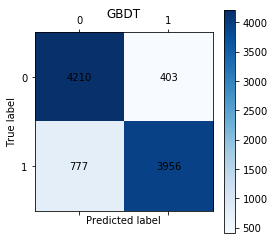

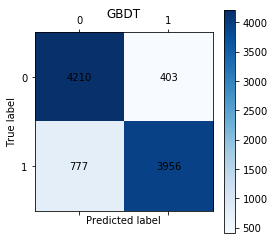

In [11]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = GBDT_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'GBDT').show() #显示混淆矩阵可视化结果

# 4 logistic回归

In [12]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


def LR_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_LR = LogisticRegression(C=1,penalty='l1') #参数说明：https://blog.csdn.net/jark_/article/details/78342644
    clf_model_LR.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_LR.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_LR.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----Logistic Regression----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_LR.score(x_train, y_train))
    print("test accuracy:", clf_model_LR.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [13]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 1.5065701007843018 s
----Logistic Regression----
Confusion matrix for training dataset is 
 [[13642  5109]
 [ 6291 12340]] 
 Confusion matrix for testing dataset is 
 [[3310 1303]
 [1564 3169]].
train accuracy: 0.6950403937724038
test accuracy: 0.693237748769527
Precision: 0.7086314847942755
Recall: 0.669554193957321
Time usage: 1.5065701007843018 s
----Logistic Regression----
Confusion matrix for training dataset is 
 [[13642  5109]
 [ 6291 12340]] 
 Confusion matrix for testing dataset is 
 [[3310 1303]
 [1564 3169]].
train accuracy: 0.6950403937724038
test accuracy: 0.693237748769527
Precision: 0.7086314847942755
Recall: 0.669554193957321


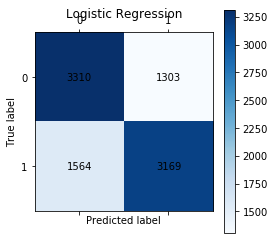

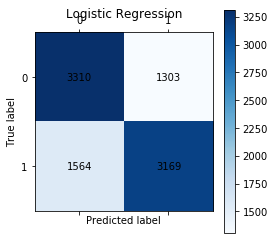

In [14]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = LR_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'Logistic Regression').show() #显示混淆矩阵可视化结果

# 5 svm

SVM运行太慢，用部分数据跑（原数据30000条，现用数据300条），数据为get_data_SVM( )

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


def get_data_SVM():
    data = pd.read_excel('/Users/ycy/Desktop/default_of_credit_card_clients_3.xls', skiprows=[0], header=0, index_col=[0])
    x_feature = list(data.columns)
    x_feature.remove('default payment next month')
    x = data[x_feature]
    y = data['default payment next month']
    sm = SMOTE(random_state=42)# 处理过采样的方法
    X, Y = sm.fit_sample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state =0)
    return x_train, x_test, y_train, y_test

In [16]:
import time
from sklearn.metrics import confusion_matrix
from sklearn import svm


def SVM_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_SVM = svm.SVC(C=0.1, kernel='linear', gamma='auto', decision_function_shape='ovr',class_weight='balanced')
    #参数说明：https://blog.csdn.net/wusecaiyun/article/details/49681431   https://blog.csdn.net/bryan__/article/details/51506801
    clf_model_SVM.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_SVM.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_SVM.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----SVM----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_SVM.score(x_train, y_train))
    print("test accuracy:", clf_model_SVM.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [17]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 283.4224042892456 s
----SVM----
Confusion matrix for training dataset is 
 [[110  76]
 [ 47 136]] 
 Confusion matrix for testing dataset is 
 [[25 20]
 [11 37]].
train accuracy: 0.6666666666666666
test accuracy: 0.6666666666666666
Precision: 0.6491228070175439
Recall: 0.7708333333333334
Time usage: 283.4224042892456 s
----SVM----
Confusion matrix for training dataset is 
 [[110  76]
 [ 47 136]] 
 Confusion matrix for testing dataset is 
 [[25 20]
 [11 37]].
train accuracy: 0.6666666666666666
test accuracy: 0.6666666666666666
Precision: 0.6491228070175439
Recall: 0.7708333333333334


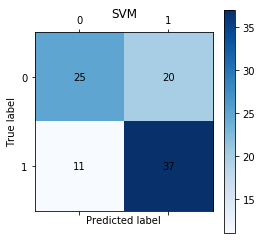

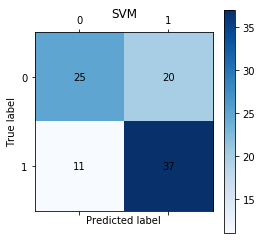

In [18]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data_SVM()
    prediction_test, conf_mat_test = SVM_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'SVM').show() #显示混淆矩阵可视化结果

# 6 XGBoost

In [19]:
import time
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


def XGB_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    # setup parameters for xgboost
    params = {}
    params['booster'] = 'gbtree'
    params['objective'] = 'binary:logistic'
    params["eval_metric"] = "auc"
    params['max_depth'] = 4
    params['lambda'] = 10
    params['min_child_weight'] = 2
    params['subsample'] = 0.75
    params['colsample_bytree'] = 0.75
    params['eta'] = 0.025
    params['silent'] = 1
    params['seed'] = 0
    params['nthread'] = 8
    clf_model_XGB = xgb.XGBClassifier(params)
    clf_model_XGB.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_XGB.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_XGB.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----XGBoost----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_XGB.score(x_train, y_train))
    print("test accuracy:", clf_model_XGB.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [20]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

In [21]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = XGB_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'XGBoost').show() #显示混淆矩阵可视化结果

NameError: name 'xgb' is not defined

NameError: name 'xgb' is not defined